# I might get 0, 1, or 2 scholarships while studying computer science at Boulder, with probabilities 0.2, 0.5, and 0.3. Each scholarship gives $10,000 per year. If college costs $84,800 total and I earn $7,000 per year, what is my expected total debt after 4 years?
 
The variable represents the total debt I have after four years of college.
One trial simulates my entire college experience, where I might receive 0, 1, or 2 scholarships with the given probabilities (0.2, 0.5, 0.3).
The possible outcomes of each trial are the total debt amounts at graduation: $56,800, $16,800, or $0, depending on how many scholarships I receive.

In one trial: got 1 scholarships → total debt = $16,800.00

After 100 simulations:
Average (expected) total debt: $17,888.00


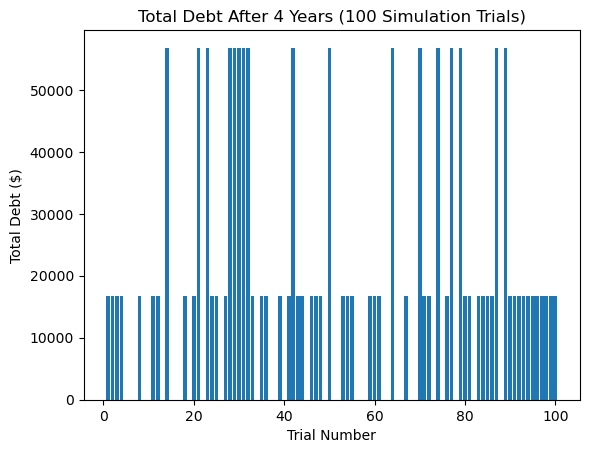

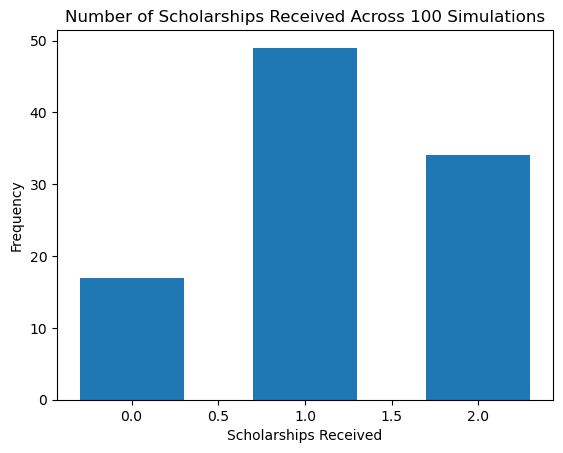

In [8]:
import random
import matplotlib.pyplot as plt

# --- Setup ---
num_simulations = 100

# Probabilities for number of scholarships (0, 1, or 2)
scholarship_options = [0, 1, 2]
probabilities = [0.2, 0.5, 0.3]

# Constants
total_cost = 84800
income_per_year = 7000
total_income = income_per_year * 4
scholarship_value_per_year = 10000
scholarship_total_value = scholarship_value_per_year * 4

# --- Function for one trial ---
def one_trial():
    scholarships = random.choices(scholarship_options, probabilities)[0]
    total_scholarship = scholarships * scholarship_total_value
    total_available = total_income + total_scholarship
    debt = max(total_cost - total_available, 0)
    return scholarships, debt

# --- Run simulation ---
results = []
for _ in range(num_simulations):
    scholarships, debt = one_trial()
    results.append((scholarships, debt))

# --- Count outcomes ---
debt_values = [d for _, d in results]
scholarship_counts = [s for s, _ in results]

# --- Display one trial example ---
example_trial = one_trial()
print(f"In one trial: got {example_trial[0]} scholarships → total debt = ${example_trial[1]:,.2f}")

# --- Display simulation summary ---
avg_debt = sum(debt_values) / len(debt_values)
print(f"\nAfter {num_simulations} simulations:")
print(f"Average (expected) total debt: ${avg_debt:,.2f}")

# --- Bar chart: show debt per simulation ---
plt.bar(range(1, num_simulations + 1), debt_values)
plt.title("Total Debt After 4 Years (100 Simulation Trials)")
plt.xlabel("Trial Number")
plt.ylabel("Total Debt ($)")
plt.show()

# --- Optional: Bar chart comparing number of scholarships ---
plt.hist(scholarship_counts, bins=[-0.5,0.5,1.5,2.5], rwidth=0.6)
plt.title("Number of Scholarships Received Across 100 Simulations")
plt.xlabel("Scholarships Received")
plt.ylabel("Frequency")
plt.show()

The theoretical expected debt is $19,760, but after running 100 simulations, the average debt was $17,888. This means the simulation showed slightly less debt, likely because it got more scholarships than expected. The results are close, showing that the simulation matches the theory pretty well.